<a href="https://colab.research.google.com/github/ritwikraha/Open-Generative-Fill/blob/SLD/notebooks/sld/sld_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -qq diffusers
! pip install -qq accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
import numpy as np
from PIL import Image
import requests
import torch
from io import BytesIO
import matplotlib

from diffusers import StableDiffusionDiffEditPipeline
from diffusers import DDIMScheduler, DDIMInverseScheduler
from diffusers import AutoPipelineForImage2Image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
import numpy as np
from diffusers.utils import make_image_grid, load_image

In [4]:
image_url = "https://huggingface.co/datasets/ritwikraha/random-storage/resolve/main/tree.png"
mask_url = "https://huggingface.co/datasets/ritwikraha/random-storage/resolve/main/tree-mask.png"

initial_image = load_image(image_url).resize((768, 768))
initial_mask = load_image(mask_url).resize((96, 96))

In [5]:
image_source = np.array(initial_image)
H, W, _ = image_source.shape

print(f"{H=}, {W=}")

H=768, W=768


## Attribute Modification

In [ ]:
# Initialize the Stable Diffusion pipeline
diff_edit_pipeline = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base",
    torch_dtype=torch.float16,
).to("cuda")
diff_edit_pipeline.scheduler = DDIMScheduler.from_config(
    diff_edit_pipeline.scheduler.config
)
diff_edit_pipeline.inverse_scheduler = DDIMInverseScheduler.from_config(
    diff_edit_pipeline.scheduler.config
)

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [ ]:
base_object = "tree"
mask_prompt = f"a {base_object}"

In [ ]:
image_latents = diff_edit_pipeline.invert(
    image=initial_image,
    prompt=mask_prompt,
    generator=torch.Generator(device="cuda").manual_seed(42),
).latents

print(f"{image_latents.shape=}")

  0%|          | 0/40 [00:00<?, ?it/s]

image_latents.shape=torch.Size([1, 40, 4, 96, 96])


In [ ]:
new_object = "vase"
new_prompt = f"a {new_object}"

old_object_region = np.array(initial_mask)
# Note: Change the mask shape
old_object_region = old_object_region.astype(np.bool_)[np.newaxis, ..., 0]
print(old_object_region.shape)

(1, 96, 96)


In [ ]:
inpainted_image = diff_edit_pipeline(
    prompt=new_prompt,
    mask_image=old_object_region[0],
    image_latents=image_latents,
    guidance_scale=7.5,
    generator=torch.Generator(device="cuda").manual_seed(42),
    negative_prompt="",
).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

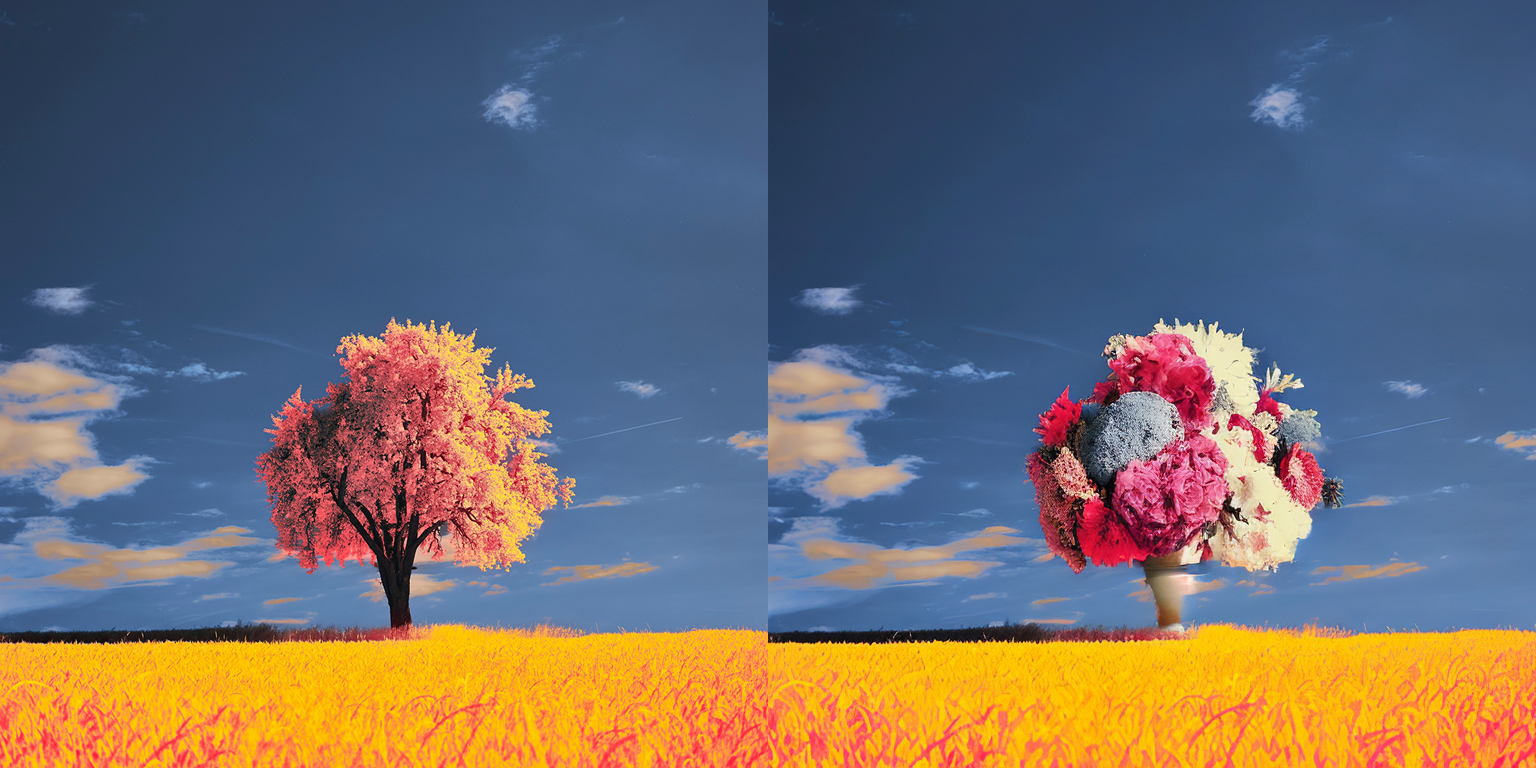

In [ ]:
make_image_grid([initial_image, inpainted_image], rows=1, cols=2)

## Correction

In [6]:
import torch
from transformers import (
    CLIPTextModel,
    CLIPTokenizer,
)
from diffusers import (
    AutoencoderKL,
    DDIMScheduler,
    DDIMInverseScheduler,
    DPMSolverMultistepScheduler,
    UNet2DConditionModel,
)

from easydict import EasyDict

In [7]:
def load_sd(
    key="runwayml/stable-diffusion-v1-5",
    use_fp16=False,
    load_inverse_scheduler=True,
    use_dpm_multistep_scheduler=False,
    scheduler_cls=None
):
    # run final results in fp32
    if use_fp16:
        dtype = torch.float16
        revision = "fp16"
    else:
        dtype = torch.float
        revision = "main"

    torch_device = "cuda" if torch.cuda.is_available() else "cpu"
    vae = AutoencoderKL.from_pretrained(key, subfolder="vae", torch_dtype=dtype).to(torch_device)
    tokenizer = CLIPTokenizer.from_pretrained(key, subfolder="tokenizer", revision=revision, torch_dtype=dtype)
    text_encoder = CLIPTextModel.from_pretrained(key, subfolder="text_encoder", revision=revision, torch_dtype=dtype).to(torch_device)
    unet = UNet2DConditionModel.from_pretrained(key, subfolder="unet", revision=revision, torch_dtype=dtype).to(torch_device)
    # print(unet)
    # exit()
    if scheduler_cls is None: # Default setting (for compatibility)
        if use_dpm_multistep_scheduler:
            scheduler = DPMSolverMultistepScheduler.from_pretrained(key, subfolder="scheduler", revision=revision, torch_dtype=dtype)
        else:
            scheduler = DDIMScheduler.from_pretrained(key, subfolder="scheduler", revision=revision, torch_dtype=dtype)
    else:
        print("Using scheduler:", scheduler_cls)
        assert not use_dpm_multistep_scheduler, "`use_dpm_multistep_scheduler` cannot be used with `scheduler_cls`"
        scheduler = scheduler_cls.from_pretrained(key, subfolder="scheduler", revision=revision, torch_dtype=dtype)

    model_dict = EasyDict(vae=vae, tokenizer=tokenizer, text_encoder=text_encoder, unet=unet, scheduler=scheduler, dtype=dtype)

    if load_inverse_scheduler:
        inverse_scheduler = DDIMInverseScheduler.from_config(scheduler.config)
        model_dict.inverse_scheduler = inverse_scheduler

    return model_dict

In [8]:
model_dict = load_sd()

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [9]:
def encode(model_dict, image, generator):
    """
    image should be a PIL object or numpy array with range 0 to 255
    """

    vae, dtype = model_dict.vae, model_dict.dtype

    if isinstance(image, Image.Image):
        w, h = image.size
        assert (
            w % 8 == 0 and h % 8 == 0
        ), f"h ({h}) and w ({w}) should be a multiple of 8"
        # w, h = (x - x % 8 for x in (w, h))  # resize to integer multiple of 8
        # image = np.array(image.resize((w, h), resample=Image.Resampling.LANCZOS))[None, :]
        image = np.array(image)

    if isinstance(image, np.ndarray):
        assert (
            image.dtype == np.uint8
        ), f"Should have dtype uint8 (dtype: {image.dtype})"
        image = image.astype(np.float32) / 255.0
        image = image[None, ...]
        image = image.transpose(0, 3, 1, 2)
        image = 2.0 * image - 1.0
        image = torch.from_numpy(image)

    assert isinstance(image, torch.Tensor), f"type of image: {type(image)}"
    torch_device = "cuda" if torch.cuda.is_available() else "cpu"
    image = image.to(device=torch_device, dtype=dtype)
    latents = vae.encode(image).latent_dist.sample(generator)

    latents = vae.config.scaling_factor * latents

    return latents

In [10]:
def get_inverse_timesteps(inverse_scheduler, num_inference_steps, strength):
    # get the original timestep using init_timestep
    init_timestep = min(int(num_inference_steps * strength), num_inference_steps)

    t_start = max(num_inference_steps - init_timestep, 0)

    # safety for t_start overflow to prevent empty timsteps slice
    if t_start == 0:
        return inverse_scheduler.timesteps, num_inference_steps
    timesteps = inverse_scheduler.timesteps[:-t_start]

    return timesteps, num_inference_steps - t_start

In [11]:
def invert(
    model_dict, latents, input_embeddings, num_inference_steps, guidance_scale=7.5
):
    """
    latents: encoded from the image, should not have noise (t = 0)

    returns inverted_latents for all time steps
    """
    vae, tokenizer, text_encoder, unet, scheduler, inverse_scheduler, dtype = (
        model_dict.vae,
        model_dict.tokenizer,
        model_dict.text_encoder,
        model_dict.unet,
        model_dict.scheduler,
        model_dict.inverse_scheduler,
        model_dict.dtype,
    )
    text_embeddings, uncond_embeddings, cond_embeddings = input_embeddings

    inverse_scheduler.set_timesteps(num_inference_steps, device=latents.device)
    # We need to invert all steps because we need them to generate the background.
    timesteps, num_inference_steps = get_inverse_timesteps(
        inverse_scheduler, num_inference_steps, strength=1.0
    )

    inverted_latents = [latents.cpu()]
    for t in tqdm(timesteps):
        # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
        if guidance_scale > 0.0:
            latent_model_input = torch.cat([latents] * 2)

            latent_model_input = inverse_scheduler.scale_model_input(
                latent_model_input, timestep=t
            )

            # predict the noise residual
            with torch.no_grad():
                noise_pred = unet(
                    latent_model_input, t, encoder_hidden_states=text_embeddings
                ).sample

            # perform guidance
            noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
            noise_pred = noise_pred_uncond + guidance_scale * (
                noise_pred_text - noise_pred_uncond
            )
        else:
            latent_model_input = latents

            latent_model_input = inverse_scheduler.scale_model_input(
                latent_model_input, timestep=t
            )

            # predict the noise residual
            with torch.no_grad():
                noise_pred_uncond = unet(
                    latent_model_input, t, encoder_hidden_states=uncond_embeddings
                ).sample

            # perform guidance
            noise_pred = noise_pred_uncond

        # compute the previous noisy sample x_t -> x_t-1
        latents = inverse_scheduler.step(noise_pred, t, latents).prev_sample

        inverted_latents.append(latents.cpu())

    assert len(inverted_latents) == (len(timesteps) + 1)
    # timestep is the first dimension
    inverted_latents = torch.stack(list(reversed(inverted_latents)), dim=0)

    return inverted_latents

In [12]:
def encode_prompts(tokenizer, text_encoder, prompts, negative_prompt="", return_full_only=False, one_uncond_input_only=False):
    if negative_prompt == "":
        print("Note that negative_prompt is an empty string")

    text_input = tokenizer(
        prompts, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
    )

    max_length = text_input.input_ids.shape[-1]
    if one_uncond_input_only:
        num_uncond_input = 1
    else:
        num_uncond_input = len(prompts)
    uncond_input = tokenizer([negative_prompt] * num_uncond_input, padding="max_length", max_length=max_length, return_tensors="pt")

    with torch.no_grad():
        torch_device = "cuda" if torch.cuda.is_available() else "cpu"
        uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]
        cond_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

    if one_uncond_input_only:
        return uncond_embeddings, cond_embeddings

    text_embeddings = torch.cat([uncond_embeddings, cond_embeddings])

    if return_full_only:
        return text_embeddings
    return text_embeddings, uncond_embeddings, cond_embeddings

In [13]:
def get_all_latents(img_np, model_dict, inv_seed=1):
    generator = torch.cuda.manual_seed(42)
    cln_latents = encode(model_dict, img_np, generator)
    # Magic prompt
    # Have tried using the parsed bg prompt from the LLM, but it doesn't work well
    prompt = "A realistic photo of a scene"
    input_embeddings = encode_prompts(
        prompts=[prompt],
        tokenizer=model_dict.tokenizer,
        text_encoder=model_dict.text_encoder,
        one_uncond_input_only=False,
    )
    # Get all hidden latents
    all_latents = invert(
        model_dict,
        cln_latents,
        input_embeddings,
        num_inference_steps=50,
        guidance_scale=2.5,
    )
    return all_latents, input_embeddings

In [14]:
from PIL import Image

In [15]:
def correction(
    # entry, add_objects, move_objects,
    # remove_region, change_attr_objects,
    # models, config
):
    # spec = {
    #     "add_objects": add_objects,
    #     "move_objects": move_objects,
    #     "prompt": entry["instructions"],
    #     "remove_region": remove_region,
    #     "change_objects": change_attr_objects,
    #     "all_objects": entry["llm_suggestion"],
    #     "bg_prompt": entry["bg_prompt"],
    #     "extra_neg_prompt": entry["neg_prompt"],
    # }
    # image_source = np.array(Image.open(entry["output"][-1]))
    # image_source = image_source
    # Background latent preprocessing
    all_latents, _ = get_all_latents(image_source, model_dict,)
    return all_latents
    # ret_dict = image_generator.run(
    #     spec,
    #     fg_seed_start=int(config.get("SLD", "fg_seed")),
    #     bg_seed=int(config.get("SLD", "bg_seed")),
    #     bg_all_latents=all_latents,
    #     frozen_step_ratio=float(config.get("SLD", "frozen_step_ratio")),
    # )
    # return ret_dict


In [16]:
from tqdm import tqdm

In [17]:
all_latents = correction()

Note that negative_prompt is an empty string


100%|██████████| 50/50 [00:20<00:00,  2.46it/s]


In [19]:
all_latents.shape

torch.Size([51, 1, 4, 96, 96])

In [ ]:
def run(
    spec,
    bg_all_latents=None,
    bg_seed=1,
    overall_prompt_override="",
    fg_seed_start=20,
    frozen_step_ratio=0.5,
    num_inference_steps=50,
    loss_scale=5,
    loss_threshold=5.0,
    max_iter=[4] * 5 + [3] * 5 + [2] * 5 + [2] * 5 + [1] * 10,
    max_index_step=0,
    overall_loss_scale=5,
    overall_loss_threshold=5.0,
    overall_max_iter=[4] * 5 + [3] * 5 + [2] * 5 + [2] * 5 + [1] * 10,
    overall_max_index_step=30,
    so_gligen_scheduled_sampling_beta=0.4,
    overall_gligen_scheduled_sampling_beta=0.4,
    overall_fg_top_p=0.2,
    overall_bg_top_p=0.2,
    overall_fg_weight=1.0,
    overall_bg_weight=4.0,
    ref_ca_loss_weight=2.0,
    so_center_box=False,
    fg_blending_ratio=0.1,
    so_negative_prompt=DEFAULT_SO_NEGATIVE_PROMPT,
    overall_negative_prompt=DEFAULT_OVERALL_NEGATIVE_PROMPT,
    so_horizontal_center_only=True,
    align_with_overall_bboxes=False,
    horizontal_shift_only=True,
    use_fast_schedule=False,
    # Transfer the cross-attention from single object generation (with ref_ca_saved_attns)
    # Use reference cross attention to guide the cross attention in the overall generation
    use_ref_ca=True,
    use_autocast=True,
    verbose=False,
):
    """
    spec: the spec for generation (see generate.py for how to construct a spec)
    bg_seed: background seed
    overall_prompt_override: use custom overall prompt (rather than the object prompt)
    fg_seed_start: each foreground has a seed (fg_seed_start + i), where i is the index of the foreground
    frozen_step_ratio: how many steps should be frozen (as a ratio to inference steps)
    num_inference_steps: number of inference steps
    (overall_)loss_scale: loss scale for per box or overall generation
    (overall_)loss_threshold: loss threshold for per box or overall generation, below which the loss will not be optimized to prevent artifacts
    (overall_)max_iter: max iterations of loss optimization for each step. If scaler, this is applied to all steps.
    (overall_)max_index_step: max index to apply loss optimization to.
    so_gligen_scheduled_sampling_beta and overall_gligen_scheduled_sampling_beta: the guidance steps with GLIGEN
    overall_fg_top_p and overall_bg_top_p: the top P fraction to optimize
    overall_fg_weight and overall_bg_weight: the weight for foreground and background optimization.
    ref_ca_loss_weight: weight for attention transfer (i.e., attention reference loss) to ensure the per-box generation is similar to overall generation in the masked region
    so_center_box: using centered box in single object generation to ensure better spatial control in the generation
    fg_blending_ratio: how much should each foreground initial noise deviate from the background initial noise (and each other)
    so_negative_prompt and overall_negative_prompt: negative prompt for single object (per-box) or overall generation
    so_horizontal_center_only: move to the center horizontally only
    align_with_overall_bboxes: Align the center of the mask, latents, and cross-attention with the center of the box in overall bboxes
    horizontal_shift_only: only shift horizontally for the alignment of mask, latents, and cross-attention
    use_fast_schedule: since the per-box generation, after the steps for latent and attention transfer, is only used by SAM (which does not need to be precise), we skip steps after the steps needed for transfer with a fast schedule.
    use_ref_ca: Use reference cross attention to guide the cross attention in the overall generation
    use_autocast: enable automatic mixed precision (saves memory and makes generation faster)
    Note: attention guidance is disabled for per-box generation by default (`max_index_step` set to 0) because we did not find it improving the results. Attention guidance and reference attention are still enabled for final guidance (overall generation). They greatly improve attribute binding compared to GLIGEN.
    """

    frozen_step_ratio = min(max(frozen_step_ratio, 0.0), 1.0)
    frozen_steps = int(num_inference_steps * frozen_step_ratio)


    original_remove = spec["remove_region"].astype(np.bool_)
    # print(
    #     "Key generation settings:",
    #     spec,
    #     bg_seed,
    #     fg_seed_start,
    #     frozen_step_ratio,
    #     so_gligen_scheduled_sampling_beta,
    #     overall_gligen_scheduled_sampling_beta,
    #     overall_max_index_step,
    # )

    if (
        len(spec["add_objects"])
        + len(spec["move_objects"])
        + len(spec["change_objects"])
    ) > 0:
        # add
        add_spec = {}
        add_spec["prompt"] = spec["prompt"]
        add_spec["bg_prompt"] = spec["bg_prompt"]
        add_spec["extra_neg_prompt"] = spec["extra_neg_prompt"]
        add_spec["gen_boxes"] = []

        for obj in spec["add_objects"]:
            coord = [int(x * 512) for x in obj[1]]
            obj_name = f"a {obj[0].split('#')[0].strip()}"
            add_spec["gen_boxes"].append((obj_name, coord))
        (
            so_prompt_phrase_word_box_list,
            overall_prompt,
            overall_phrases_words_bboxes,
        ) = parse.convert_spec(add_spec, height, width, verbose=verbose)

        if overall_prompt_override and overall_prompt_override.strip():
            overall_prompt = overall_prompt_override.strip()

        overall_phrases, overall_words, overall_bboxes = (
            [item[0] for item in overall_phrases_words_bboxes],
            [item[1] for item in overall_phrases_words_bboxes],
            [item[2] for item in overall_phrases_words_bboxes],
        )

        # The so box is centered but the overall boxes are not (since we need to place to the right place).
        if so_center_box:
            so_prompt_phrase_word_box_list = [
                (
                    prompt,
                    phrase,
                    word,
                    utils.get_centered_box(
                        bbox, horizontal_center_only=so_horizontal_center_only
                    ),
                )
                for prompt, phrase, word, bbox in so_prompt_phrase_word_box_list
            ]
            if verbose:
                print(
                    f"centered so_prompt_phrase_word_box_list: {so_prompt_phrase_word_box_list}"
                )
        so_boxes = [item[-1] for item in so_prompt_phrase_word_box_list]

        if "extra_neg_prompt" in spec and spec["extra_neg_prompt"]:
            so_negative_prompt = spec["extra_neg_prompt"] + ", " + so_negative_prompt
            overall_negative_prompt = (
                spec["extra_neg_prompt"] + ", " + overall_negative_prompt
            )

        semantic_guidance_kwargs = dict(
            loss_scale=loss_scale,
            loss_threshold=loss_threshold,
            max_iter=max_iter,
            max_index_step=max_index_step,
            use_ratio_based_loss=False,
            guidance_attn_keys=guidance_attn_keys,
            verbose=False,
        )

        sam_refine_kwargs = dict(
            discourage_mask_below_confidence=discourage_mask_below_confidence,
            discourage_mask_below_coarse_iou=discourage_mask_below_coarse_iou,
            height=height,
            width=width,
            H=H,
            W=W,
        )

        # Note that so and overall use different negative prompts

        with torch.autocast("cuda", enabled=use_autocast):
            so_prompts = [item[0] for item in so_prompt_phrase_word_box_list]
            if so_prompts:
                so_input_embeddings = models.encode_prompts(
                    prompts=so_prompts,
                    tokenizer=tokenizer,
                    text_encoder=text_encoder,
                    negative_prompt=so_negative_prompt,
                    one_uncond_input_only=True,
                )
            else:
                so_input_embeddings = []

            generator = torch.manual_seed(
                bg_seed + 87
            )  # Seed generator to create the inital latent noise

            initial_L = get_scaled_latents(
                51, unet.config.in_channels, 512, 512, generator, dtype, scheduler
            ).unsqueeze(1)


            remove_region = torch.from_numpy(original_remove).to(torch.float32).cuda()

            bg_all_latents = (
                bg_all_latents.cuda() * (1.0 - remove_region)
                + (initial_L.cuda()) * remove_region
            )
            initial_bg = bg_all_latents[0]
            # added objects
            input_latents_list, latents_bg = latents.get_input_latents_list(
                model_dict,
                bg_seed=bg_seed,
                latents_bg=initial_bg,
                fg_seed_start=fg_seed_start,
                so_boxes=so_boxes,
                fg_blending_ratio=fg_blending_ratio,
                height=height,
                width=width,
                verbose=False,
            )

            if use_fast_schedule:
                fast_after_steps = (
                    max(frozen_steps, overall_max_index_step)
                    if use_ref_ca
                    else frozen_steps
                )
            else:
                fast_after_steps = None

            if use_ref_ca or frozen_steps > 0:
                (
                    latents_all_list,
                    mask_tensor_list,
                    saved_attns_list,
                    so_img_list,
                ) = get_masked_latents_all_list(
                    so_prompt_phrase_word_box_list,
                    input_latents_list,
                    gligen_scheduled_sampling_beta=so_gligen_scheduled_sampling_beta,
                    semantic_guidance_kwargs=semantic_guidance_kwargs,
                    obj_attn_key=("down", 2, 1, 0),
                    saved_cross_attn_keys=guidance_attn_keys if use_ref_ca else [],
                    sam_refine_kwargs=sam_refine_kwargs,
                    so_input_embeddings=so_input_embeddings,
                    num_inference_steps=num_inference_steps,
                    fast_after_steps=fast_after_steps,
                    fast_rate=2,
                    verbose=verbose,
                )
            else:
                # No per-box guidance
                (latents_all_list, mask_tensor_list, saved_attns_list, so_img_list) = (
                    [],
                    [],
                    [],
                    [],
                )

            (
                composed_latents,
                foreground_indices,
                offset_list,
            ) = latents.compose_latents_with_alignment(
                model_dict,
                bg_all_latents.cpu(),
                latents_all_list,
                mask_tensor_list,
                torch.from_numpy(original_remove),
                spec["change_objects"],
                spec["move_objects"],
                num_inference_steps,
                overall_batch_size,
                height,
                width,
                latents_bg=latents_bg,
                align_with_overall_bboxes=align_with_overall_bboxes,
                overall_bboxes=overall_bboxes,
                horizontal_shift_only=horizontal_shift_only,
                use_fast_schedule=use_fast_schedule,
                fast_after_steps=fast_after_steps,
                bg_seed=bg_seed,
            )

            if use_ref_ca:
                # ref_ca_saved_attns has the same hierarchy as bboxes
                ref_ca_saved_attns = []

                flattened_box_idx = 0
                for bboxes in overall_bboxes:
                    # bboxes: correspond to a phrase
                    ref_ca_current_phrase_saved_attns = []
                    for bbox in bboxes:
                        # each individual bbox
                        saved_attns = saved_attns_list[flattened_box_idx]
                        if align_with_overall_bboxes:
                            offset = offset_list[flattened_box_idx]
                            saved_attns = attn.shift_saved_attns(
                                saved_attns,
                                offset,
                                guidance_attn_keys=guidance_attn_keys,
                                horizontal_shift_only=horizontal_shift_only,
                            )
                        ref_ca_current_phrase_saved_attns.append(saved_attns)
                        flattened_box_idx += 1
                    ref_ca_saved_attns.append(ref_ca_current_phrase_saved_attns)

            overall_bboxes_flattened, overall_phrases_flattened = [], []

            for obj_name, coords in spec["all_objects"]:
                obj_name = f"a {obj_name.split('#')[0].strip()}"
                x_min, y_min, h, w = coords
                new_coords = (x_min, y_min, x_min + h, y_min + w)
                overall_bboxes_flattened.append(new_coords)
                overall_phrases_flattened.append(obj_name)
            # Create overall prompt
            bg_prompt = spec["bg_prompt"]

            object_str = ", ".join(overall_phrases_flattened)
            overall_prompt = f"{bg_prompt} with {object_str}"

            (
                overall_object_positions,
                overall_word_token_indices,
                overall_prompt,
            ) = guidance.get_phrase_indices(
                tokenizer=tokenizer,
                prompt=overall_prompt,
                phrases=overall_phrases,
                words=overall_words,
                verbose=verbose,
                return_word_token_indices=True,
                add_suffix_if_not_found=True,
            )
            overall_input_embeddings = models.encode_prompts(
                prompts=[overall_prompt],
                tokenizer=tokenizer,
                negative_prompt=overall_negative_prompt,
                text_encoder=text_encoder,
            )

            # This is currently not-shared with the single object one.
            overall_semantic_guidance_kwargs = dict(
                loss_scale=overall_loss_scale,
                loss_threshold=overall_loss_threshold,
                max_iter=overall_max_iter,
                max_index_step=overall_max_index_step,
                fg_top_p=overall_fg_top_p,
                bg_top_p=overall_bg_top_p,
                fg_weight=overall_fg_weight,
                bg_weight=overall_bg_weight,
                # ref_ca comes from the attention map of the word token of the phrase in single object generation, so we apply it only to the word token of the phrase in overall generation.
                ref_ca_word_token_only=True,
                # If a word is not provided, we use the last token.
                ref_ca_last_token_only=True,
                ref_ca_saved_attns=ref_ca_saved_attns if use_ref_ca else None,
                word_token_indices=overall_word_token_indices,
                guidance_attn_keys=guidance_attn_keys,
                ref_ca_loss_weight=ref_ca_loss_weight,
                use_ratio_based_loss=False,
                verbose=verbose,
            )

            # Generate with composed latents

            # Foreground should be frozen
            frozen_mask = (foreground_indices != 0).to(torch.float32).cuda()

            # TODO: It seems like there are some bugs
            print(f"Final prompt: {overall_prompt}")
            with torch.autocast("cuda", enabled=use_autocast):
                _, images, _ = pipelines.generate_gligen_final(
                    model_dict,
                    composed_latents,
                    overall_input_embeddings,
                    num_inference_steps,
                    overall_bboxes_flattened,
                    overall_phrases_flattened,
                    guidance_scale=guidance_scale,
                    gligen_scheduled_sampling_beta=overall_gligen_scheduled_sampling_beta,
                    semantic_guidance=True,
                    semantic_guidance_bboxes=overall_bboxes,
                    semantic_guidance_object_positions=overall_object_positions,
                    semantic_guidance_kwargs=overall_semantic_guidance_kwargs,
                    frozen_steps=frozen_steps,
                    frozen_mask=frozen_mask,
                    initial_bg=None,
                    return_saved_cross_attn=True,
                )

            return EasyDict(image=images[0], so_img_list=so_img_list, final_prompt=overall_prompt)
    else:
        # Only removal
        frozen_mask = torch.from_numpy(~original_remove).to(torch.float32).cuda()
        # composed_latents = bg_all_latents[1:]
        # prompt = "A realistic cartoon-style painting"
        prompt = spec["bg_prompt"]
        # prompt = spec["prompt"]
        if "extra_neg_prompt" in spec and spec["extra_neg_prompt"]:
            overall_negative_prompt = (
                spec["extra_neg_prompt"] + ", " + DEFAULT_OVERALL_NEGATIVE_PROMPT
            )
        else:
            overall_negative_prompt = DEFAULT_OVERALL_NEGATIVE_PROMPT
        overall_input_embeddings = models.encode_prompts(
            prompts=[prompt],
            tokenizer=models.model_dict.tokenizer,
            text_encoder=models.model_dict.text_encoder,
            negative_prompt=overall_negative_prompt,
            one_uncond_input_only=False,
        )
        composed_latents = bg_all_latents.cuda()

        generator = torch.manual_seed(
            bg_seed
        )  # Seed generator to create the inital latent noise


        latents_bg = get_scaled_latents(
            51,
            unet.config.in_channels,
            height,
            width,
            generator,
            dtype,
            scheduler,
        )
        latents_bg = latents_bg.unsqueeze(1)
        frozen_mask_expanded = frozen_mask[None, None, None, ...].repeat(51, 1, 4, 1, 1)
        composed_latents[frozen_mask_expanded == 0] = latents_bg[
            frozen_mask_expanded == 0
        ]

        so_img_list = None

        overall_bboxes_flattened = []
        overall_phrases_flattened = []
        overall_bboxes = []
        overall_object_positions = []
        overall_semantic_guidance_kwargs = None

        with torch.autocast("cuda", enabled=use_autocast):
            _, images = pipelines.generate_gligen_final(
                model_dict,
                composed_latents,
                overall_input_embeddings,
                num_inference_steps,
                overall_bboxes_flattened,
                overall_phrases_flattened,
                guidance_scale=guidance_scale,
                gligen_scheduled_sampling_beta=overall_gligen_scheduled_sampling_beta,
                semantic_guidance=True,
                semantic_guidance_bboxes=overall_bboxes,
                semantic_guidance_object_positions=overall_object_positions,
                semantic_guidance_kwargs=overall_semantic_guidance_kwargs,
                frozen_steps=frozen_steps,
                frozen_mask=frozen_mask,
            )

            print(
                f"Generation with spatial guidance from input latents and first {frozen_steps} steps frozen (directly from the composed latents input)"
            )
            print("Generation from composed latents (with semantic guidance)")

    # utils.free_memory()

    return EasyDict(image=images[0], so_img_list=so_img_list, final_prompt=prompt)

In [ ]:
ret_dict = run(
    spec,
    fg_seed_start=42,
    bg_seed=42,
    bg_all_latents=all_latents,
    frozen_step_ratio=float(0.5),
)